# Is Moneyball still relevant?

## Introduction

Michael Lewis's bestseller *Moneyball*  talks about Oakland Athletics' unexpected success in early 2000's. The secret to their success, or the "science of winning an unfair game" as Michael Lewis puts it, was putting all variables in baseball to statistical testing and finding out the ones that are truly relevant. According to Paul DePodesta, who was an an assistant to general manager Billy Beane, the statistics that correlated most closely with winning percentage were on-base percentage(OBP) and slugging percentage(SLG). DePodesta used data from every baseball team in the twentieth century and discovered that those two statistics, both of which are offensive, are the most meaningful predictors of a team's success and everything else was far less important.

For me, the most intriguing part of DePodesta's argument lied in the fact that he claimed offensive statistics mattered more than the defensive ones. In Korea, baseball is generally believed to be all about the pitchers; in fact, baseball is often referred to as "the sport of pitchers" there. Overall, contrary to DePodesta's argument, in Korea, offensive statistics are the ones usually regarded as less important and the pitching statistics, especially those of the starters, are the ones deemed far more important.

In this project, I will test the validity of DePodesta's argument in the context of baseball after DePodesta's time. Through the project, I will see if Korean view of baseball is relevant in Major League Baseball by taking statistics from starting pitchers into account. In summary, I will use statistics of every baseball team from 2000 to 2015 and answer the following questions. 

**Question1**: What are the statistics most closely correlated to winning baseball games?

**Question2**: Are OBP and SLG more important factors than other statistics?

**Question3**: What are the factors less important in winning baseball games?

**Question4**: What are the statistics overvalued by conventional wisdom?



## Data Organization

### Geting Team data

In [14]:
# mport all necessary packages and functions.
import csv
import numpy as np
import pandas as pd


# Download Team data from The Lahman Baseball Database
filename = 'Teams.csv'
team_df = pd.read_csv(filename)


# Select data from 2000~2015 and statistics that are relevant to my project
teams_df=team_df[team_df['yearID'] > 1999][['yearID', 'teamID', 'W', 'G', 'HR', 'R', 'AB', 'H','BB', 'HBP', 'SF', 'SB','2B', '3B', 'ERA', 'Rank','FP', 'E', 'DP', 'HRA', 'HA','BBA','SOA','SV', 'attendance', 'BPF']]

teams_df.head()

,yearID,teamID,W,G,HR,R,AB,H,BB,HBP,...,FP,E,DP,HRA,HA,BBA,SOA,SV,attendance,BPF
2325,2000,ANA,82,162,236,864,5628,1574,608,47.0,...,0.978,134,182.0,228,1534,662,846,46,2066982.0,102
2326,2000,ARI,85,162,179,792,5527,1466,535,59.0,...,0.982,107,138.0,190,1441,500,1220,38,2942251.0,105
2327,2000,ATL,95,162,179,810,5489,1490,595,59.0,...,0.979,129,138.0,165,1428,484,1093,53,3234304.0,101
2328,2000,BAL,74,162,184,794,5549,1508,558,49.0,...,0.981,116,151.0,202,1547,665,1017,33,3297031.0,95
2329,2000,BOS,85,162,167,792,5630,1503,611,42.0,...,0.982,109,120.0,173,1433,498,1121,46,2585895.0,104


### Getting Starting Pitchers' Data

In [15]:
# Obtain pitching data from The Lahman Baseball Database
filename = 'Pitching.csv'
df = pd.read_csv(filename)

# Select data from 2000~2015 and since the project only looks at starters, choose players who started the game more than 10 times in a season.
pitching_df=df[(df['yearID'] > 1999) & (df['GS'] > 10)]

pitching_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
32900,abbotpa01,2000,1,SEA,AL,9,7,35,27,0,...,4.0,3.0,5.0,0,766.0,2.0,89,1.0,4.0,NaN
32909,anderbr02,2000,1,ARI,NL,11,7,33,32,2,...,7.0,1.0,3.0,4,876.0,0.0,101,6.0,6.0,NaN
32910,anderji02,2000,1,PIT,NL,5,11,27,26,1,...,2.0,6.0,7.0,0,648.0,0.0,94,5.0,3.0,NaN
32913,ankieri01,2000,1,SLN,NL,11,7,31,30,0,...,2.0,12.0,6.0,2,735.0,0.0,80,8.0,6.0,NaN
32914,appieke01,2000,1,OAK,AL,15,11,31,31,1,...,10.0,6.0,9.0,0,884.0,0.0,109,5.0,6.0,NaN


In [16]:
# Combine statistics of starters for a specific team in a specific year. And select the statistics relevant to this project.
starters_df=pitching_df.groupby(['yearID', 'teamID']).mean()[['SO', 'BAOpp', 'ERA', 'IPouts']]

# Change ERA column to SERA to stand for Starters' ERA to avoid confusion
starters_df[['*ERA*', '*SO*', '*BAOpp*', '*IPouts*' ]]=starters_df[['ERA', 'SO','BAOpp', 'IPouts']]
starters_df.drop(['ERA', 'SO', 'BAOpp', 'IPouts'],1, inplace=True)

starters_df.head()

*ERA*        *SO*   *BAOpp*    *IPouts*
yearID teamID                                            
2000   ANA     5.418571   56.142857  0.273143  308.285714
       ARI     4.630000  122.166667  0.268667  460.833333
       ATL     4.198333  125.500000  0.270333  546.000000
       BAL     5.570000  109.666667  0.280000  489.833333
       BOS     4.690000   92.875000  0.259750  350.625000

### Combining Team Data and Starting Pitchers' Data

In [17]:
# Get rid of multiindex to prepare for a concatenation with team data
starters_df.reset_index()
starters_df.index=range(starters_df.shape[0])

In [18]:
# Repeat the stepd above for team data to prepare for a concatenation
teams_df.reset_index()
teams_df.index=range(teams_df.shape[0])

In [19]:
# Concatenate. Since starters data and team data share the same ordering of the team. Simple concatenation works!
df=pd.concat([teams_df, starters_df], axis=1)
df.head()

,yearID,teamID,W,G,HR,R,AB,H,BB,HBP,...,HA,BBA,SOA,SV,attendance,BPF,*ERA*,*SO*,*BAOpp*,*IPouts*
0,2000,ANA,82,162,236,864,5628,1574,608,47.0,...,1534,662,846,46,2066982.0,102,5.418571,56.142857,0.273143,308.285714
1,2000,ARI,85,162,179,792,5527,1466,535,59.0,...,1441,500,1220,38,2942251.0,105,4.630000,122.166667,0.268667,460.833333
2,2000,ATL,95,162,179,810,5489,1490,595,59.0,...,1428,484,1093,53,3234304.0,101,4.198333,125.500000,0.270333,546.000000
3,2000,BAL,74,162,184,794,5549,1508,558,49.0,...,1547,665,1017,33,3297031.0,95,5.570000,109.666667,0.280000,489.833333
4,2000,BOS,85,162,167,792,5630,1503,611,42.0,...,1433,498,1121,46,2585895.0,104,4.690000,92.875000,0.259750,350.625000


## Standardizing Data

### Calculate Needed Statistics

In [20]:
#Allow making assignments withoout getting warnings
pd.options.mode.chained_assignment = None

#Make new columns with new statistics
df['OBP']=(df['H']+df['BB']+df['HBP'])/(df['AB']+df['BB']+df['HBP']+df['SF'])

df['SLG'] = (df['H']-(df['2B']+df['3B']+df['HR'])+2*df['HR']+3*df['3B']+4*df['HR'])/df['AB']

df['BA'] = df['H']/df['AB']

df['WR']=df['W']/df['G']

df['OPS']=df['OBP']+df['SLG']

### Correct for statistics that are better when smaller

In [21]:
#Change defensive statistics so that all correlations can be easily compared
df[['ERA', 'Rank', 'E', 'HRA','HA', '*ERA*', '*BAOpp*', 'BBA']]=df[['ERA', 'Rank', 'E', 'HRA','HA', '*ERA*', '*BAOpp*', 'BBA']]*-1


df.head()

,yearID,teamID,W,G,HR,R,AB,H,BB,HBP,...,BPF,*ERA*,*SO*,*BAOpp*,*IPouts*,OBP,SLG,BA,WR,OPS
0,2000,ANA,82,162,236,864,5628,1574,608,47.0,...,102,-5.418571,56.142857,-0.273143,308.285714,0.352355,0.446517,0.279673,0.506173,0.798873
1,2000,ARI,85,162,179,792,5527,1466,535,59.0,...,105,-4.630000,122.166667,-0.268667,460.833333,0.333387,0.392075,0.265243,0.524691,0.725463
2,2000,ATL,95,162,179,810,5489,1490,595,59.0,...,101,-4.198333,125.500000,-0.270333,546.000000,0.346477,0.394061,0.271452,0.586420,0.740538
3,2000,BAL,74,162,184,794,5549,1508,558,49.0,...,95,-5.570000,109.666667,-0.280000,489.833333,0.340580,0.389620,0.271761,0.456790,0.730199
4,2000,BOS,85,162,167,792,5630,1503,611,42.0,...,104,-4.690000,92.875000,-0.259750,350.625000,0.340547,0.370515,0.266963,0.524691,0.711062


### Standardize
> **Method**: Baseball statistics are only relative. A batting average(BA) of 0.270 is fine in most years, but in some years, it may even be below average. The strike zones can change year by year; some rules may change as well. Therefore, I will standardize all data by the average of all teams in a given year. This way, all statistics will be fairly evaluated.


In [22]:
# define standardize method
def standardize(df):

    return (df-df.mean())/(df.std(ddof=0))

# standardize all data
std_data=df.groupby('yearID')[['HR', 'R', 'AB', 'H','BB', 'HBP', 'SB','SF', '2B', '3B','OBP', 'SLG', 'OPS','BA', 'ERA', 'FP', 'E', 'DP', 'HRA', 'HA','BBA', 'SOA', '*SO*', '*BAOpp*', '*ERA*', '*IPouts*']].apply(standardize)

# win ratio does not have to be standardized
std_data['WR']=df['WR']


## Correlation with Win Ratio
### Correlation Bar Graph

In [23]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


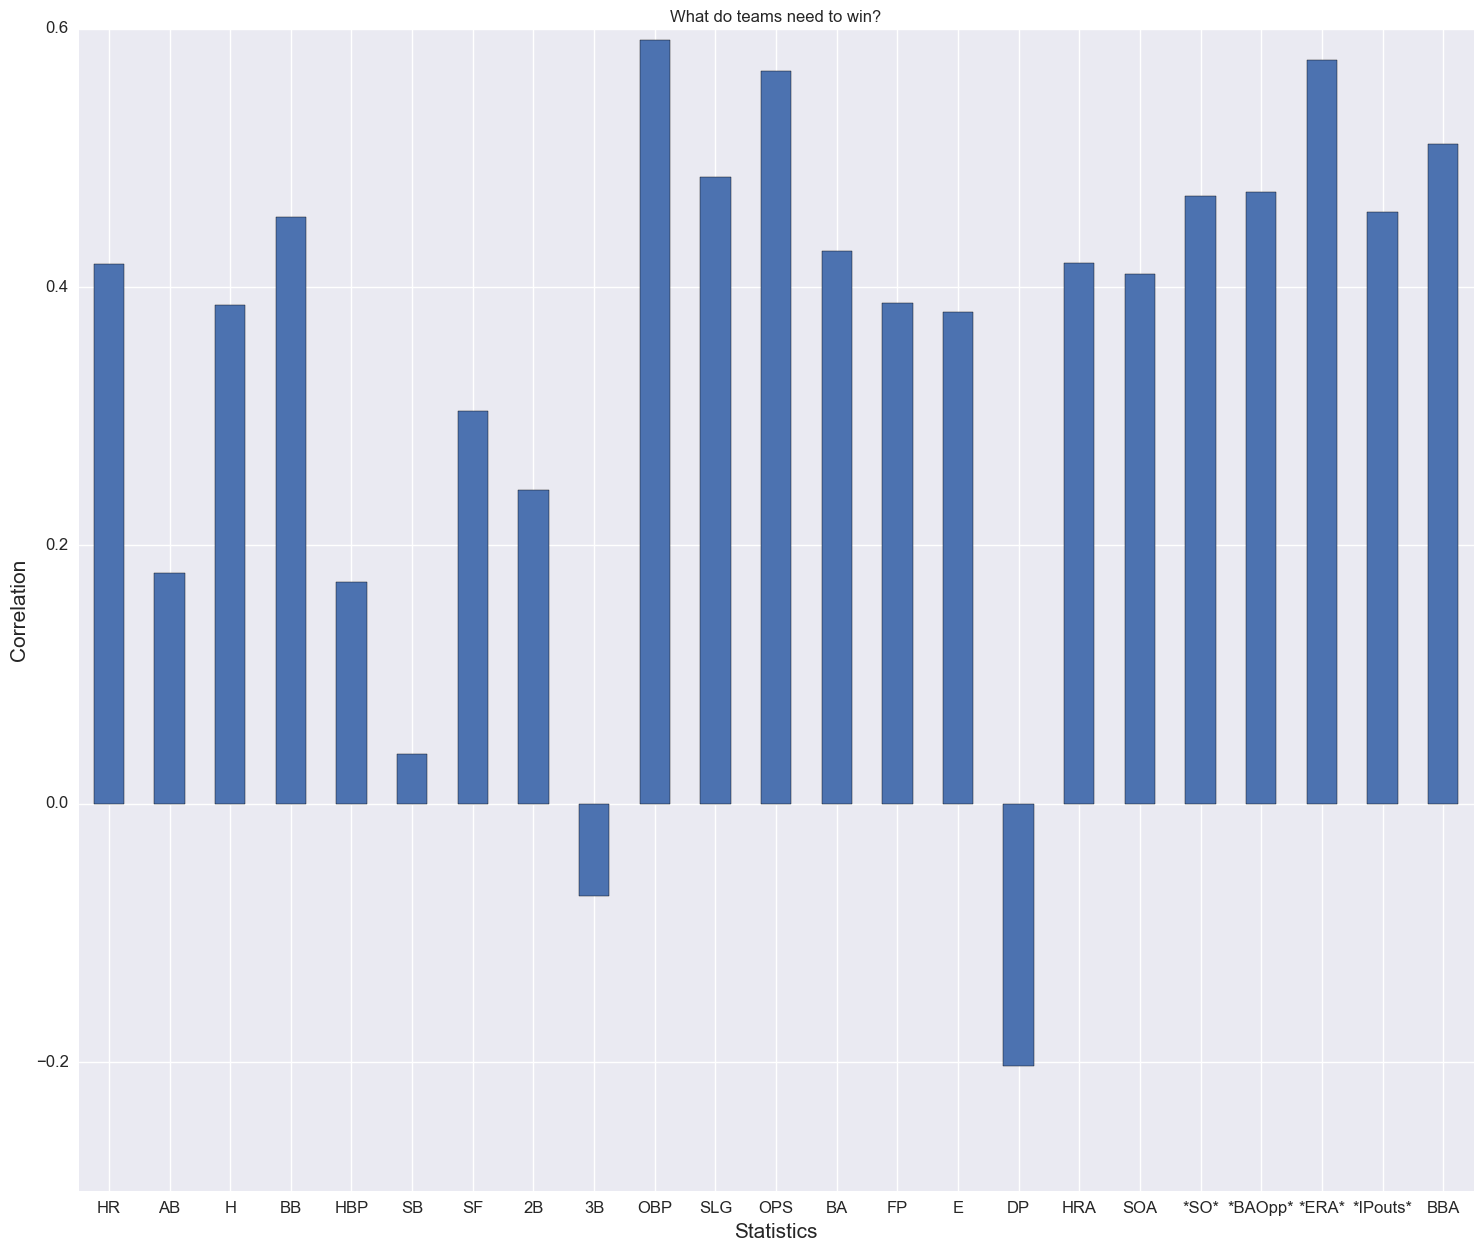

In [30]:
# Plot bar chart of all correlations of each factor with Win Ratio
std_data[['HR', 'AB', 'H','BB', 'HBP','SB', 'SF', '2B', '3B','OBP', 'SLG', 'OPS','BA', 'FP', 'E', 'DP', 'HRA','SOA', '*SO*', '*BAOpp*', '*ERA*', '*IPouts*', 'BBA']].apply(lambda x: x.corr(std_data['WR'])).plot(kind='bar', title ="What do teams need to win?", figsize=(18, 15), fontsize=12, rot=0)
plt.xlabel('Statistics', fontsize=15)
plt.ylabel('Correlation', fontsize=15)

### Takeaway from the Bar Graph

The bar graph indicates that while some statistics such as on base percentage and starting pitchers' ERA are closely correlated with win ratio, some figures such as the number of double plays made or the number of bases stolen have little correlation, some of them even negative. In order clarify the findings, more analysis was necessary. 


### Correlation Table

In [212]:
# Make a table in which correlations for all statistics are recorded
correlation_table=std_data[['HR', 'AB', 'H','BB', 'HBP','SB', 'SF', '2B', '3B','OBP', 'SLG', 'OPS','BA', 'FP', 'E', 'DP', 'HRA','SOA', '*SO*', '*BAOpp*', '*ERA*', '*IPouts*', 'BBA']].apply(lambda x: x.corr(std_data['WR']))


In [213]:
# Sort the table
correlation_table.sort_values(ascending=False)

OBP         0.591695
*ERA*       0.575781
OPS         0.567412
BBA         0.510745
SLG         0.484934
*BAOpp*     0.473684
*SO*        0.470883
*IPouts*    0.458178
BB          0.454417
BA          0.427819
HRA         0.419023
HR          0.417725
SOA         0.410525
FP          0.387492
H           0.386580
E           0.380430
SF          0.303788
2B          0.243037
AB          0.178778
HBP         0.171911
SB          0.038509
3B         -0.071327
DP         -0.202769
dtype: float64

## Answer to Question 1
Top ten statistics that are more closely related to win ratio are therefore, 
> 1. On base percentage
2. Starting pitchers' ERA
3. On base percentage + Slugging percentage
4. Walks allowed
5. Slugging percentage
6. Opponent's batting average for starting pitchers
7. Strike outs by starting pitchers
8. Innings thrown by starting pitchers
9. Walks by batters
10. Batting averages

As DePodesta predicted, on base percentage was a statistic most closely correlated to win ratio. However, slugging percentage ranked number five in the list meaning its correlation was weaker than what DePodesta would have predicted. Furthermore, the power of starting pitchers did prove to be a good predictor of a team's success as all four statistics were included in the top ten list.

However, ranking is not enough to make conclusion about the powers of correlation each factor has with win ratio. In order to compare powers of correlations, some rigorous statistical testings are necessary.

## Correlation Comparison using Steiger's Z test
Since correlations being compared are dependent sharing the same sample, Steiger's Z test was used. The formula was taken from quantpsy.org written by Ihno A. Lee and Kristopher J. Preacher.

### Cross Correlation

In [214]:
# Calculate cross correlations
cross_correlation=std_data[['OBP', 'SLG', 'OPS','BA', 'HRA', '*SO*', '*BAOpp*', '*ERA*', '*IPouts*', 'BBA']].corr()
cross_correlation.head()

,OBP,SLG,OPS,BA,HRA,*SO*,*BAOpp*,*ERA*,*IPouts*,BBA
OBP,1.000000,0.561156,0.752702,0.789950,0.041359,0.187745,0.051712,0.083650,0.194643,0.221236
SLG,0.561156,1.000000,0.966221,0.488652,-0.148728,0.177434,0.054702,0.007967,0.158784,0.120940
OPS,0.752702,0.966221,1.000000,0.630990,-0.105630,0.199431,0.061314,0.036239,0.187019,0.167554
BA,0.789950,0.488652,0.630990,1.000000,-0.044429,0.115281,-0.051011,-0.044258,0.148864,0.112600
HRA,0.041359,-0.148728,-0.105630,-0.044429,1.000000,0.293992,0.371278,0.540992,0.268555,0.174802


### Correlation Comparison Formula

In [215]:
def f_transformation(r):
    return 0.5*(np.log(1+r)-np.log(1-r))


def correlation_comparison(s1, s2):
    r3=cross_correlation[s1][s2]
    r1=correlation_table[s1]
    r2=correlation_table[s2]
    z1= f_transformation(r1)
    z2= f_transformation(r2)

    rm=(r1**2+r2**2)/2
    f= (1-r3)/(2*(1-rm))
    h= (1-(f*rm))/(1-rm)
    
    z=(z1-z2)*(np.sqrt(480-3)/np.sqrt(2*(1-r3)*h))
    if z>1.96:
        return 'Correlations for {} and {} are significantly different'.format(s1, s2)
    if z<=1.96:
        return 'Correlations for {} and {} are NOT significantly different'.format(s1, s2)    

### Test Results

In [216]:
print correlation_comparison('OBP','*ERA*')
print ''
print correlation_comparison('OBP', 'BBA')
print ''
print correlation_comparison('OBP','SLG')
print ''
print correlation_comparison('SLG', 'BA')
print ''
print correlation_comparison('*ERA*', 'BA')

Correlations for OBP and *ERA* are NOT significantly different

Correlations for OBP and BBA are NOT significantly different

Correlations for OBP and SLG are significantly different

Correlations for SLG and BA are NOT significantly different

Correlations for *ERA* and BA are significantly different


## Answer to Question 2

Although OBP had the greatest correlation with win ratio, the differences between the correlation for OBP and those for both ERA of starting pitchers and the number of walks allowed were not statistically significant at alpha = 0.05 level. 
>Therefore, it cannot be concluded that on base percentage(OBP) is a factor far more significant than others.

Furthermore, although slugging percentage was indeed ranked higher than batting average, it was not a significantly more important factor as evidenced by the test. However, ERA of the starting pitchers was a factor significantly more important than the batting average.
>Thus, sluggin percentage is not an especially important factor; in fact, it cannot be concluded that SLG is a factor significantly more important than batting average.

## Statistics with less correlated to WR

### Factors with no relationship with win ratio
It is generally believed that a correlation that is between -0.3 and 0.3 means there is no meaningful linear relationship between the two variables. Therefore, factors with such correlation were separated for analysis.

In [217]:
#Flag statistics with low correlation value
correlation_table.sort_values(ascending=False).abs()<0.3

OBP         False
*ERA*       False
OPS         False
BBA         False
SLG         False
*BAOpp*     False
*SO*        False
*IPouts*    False
BB          False
BA          False
HRA         False
HR          False
SOA         False
FP          False
H           False
E           False
SF          False
2B           True
AB           True
HBP          True
SB           True
3B           True
DP           True
dtype: bool

In order to see whether a statistic with such low correlation value does indeed have no meaningful relationship, a scatter plot was drawn. As expected, the dots seemed to be plotted in a random fashion. Notice that the scatter plot was drawn between the number of doubles and win ratio. The number of doubles has the highest correlation value with win ratio among the six statistics labeled "factors with no meaningful relationship."

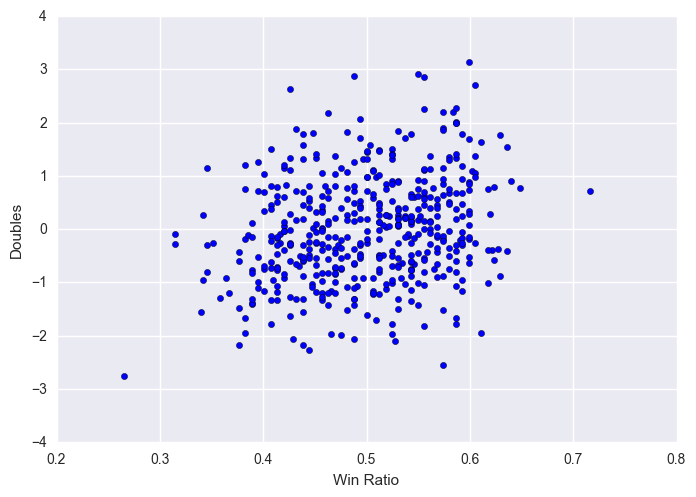

In [13]:
plt.scatter(std_data['WR'], std_data['2B'])
plt.xlabel('Win Ratio')
plt.ylabel('Doubles')

It is very counterintuitive that the number of doubles, triples, bases stolen, and double plays correlate little with the win ratio. Although by not much, the number of double plays and triples in fact correlate negatively. This is even more intriguing since SLG, which is a measure of a power of batters that take number of doubles and triples into account, is a statistic correlate closely to win ratio but statistics that make up SLG do not.  

## Answer to Question 3
The statistics with no meaningful correlation with win ratio are:
> 1. Double Plays
2. Triples
3. Stolen Bases
4. Hit By Pitchers
5. At Bats
6. Doubles

## Correlation with Runs

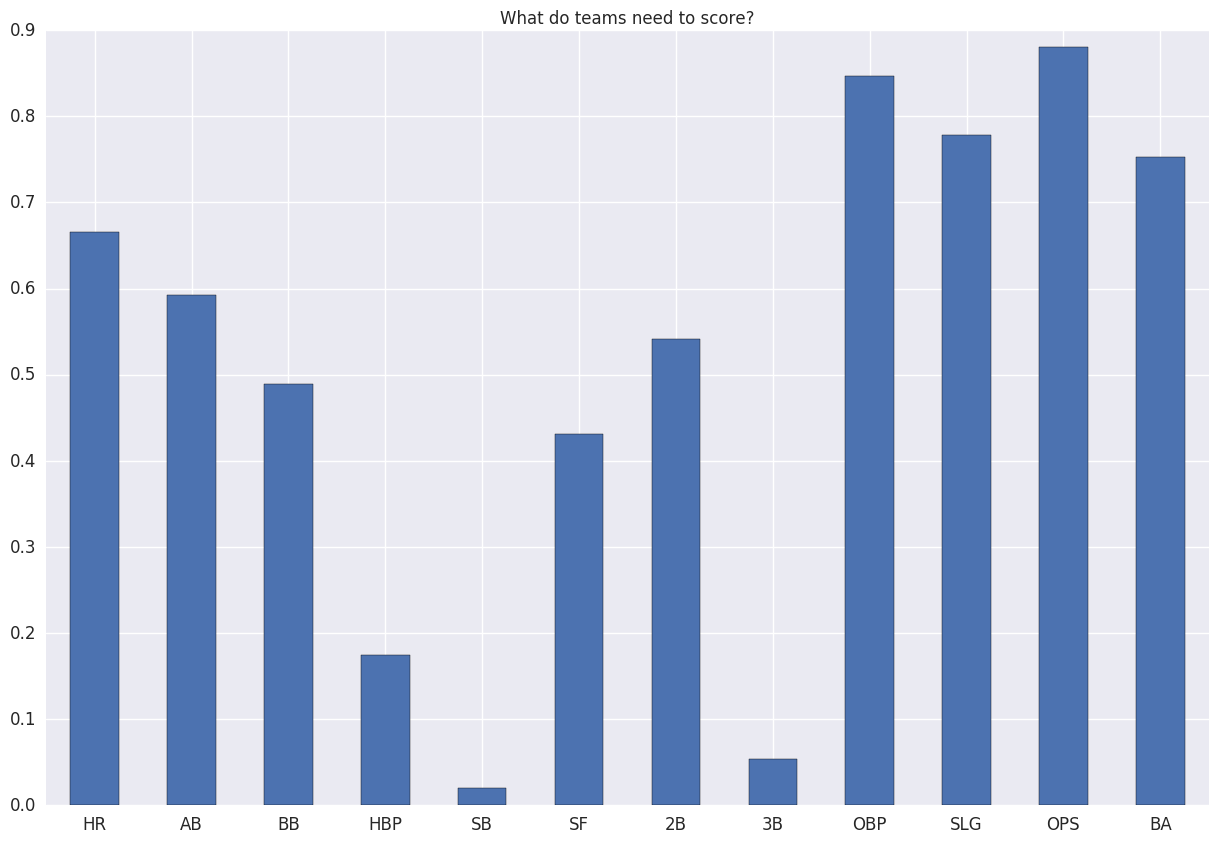

In [219]:
std_data[['HR', 'AB','BB', 'HBP','SB', 'SF', '2B', '3B','OBP', 'SLG', 'OPS','BA']].apply(lambda x: x.corr(std_data['R'])).plot(kind='bar', title ="What do teams need to score?", figsize=(15, 10), fontsize=12, rot=0)
plt.xlabel('Statistics', fontsize=15)
plt.ylabel('Correlation', fontsize=15)

As DePodesta predicted, OBP, SLG, and OPS are better predictors of a team's offensive success. (they were more closely correlated to "Runs.") It is quite interesting to note that the number of stolen bases and the number of triples show no meaningful relationship here as well. 

## Correlation with ERA

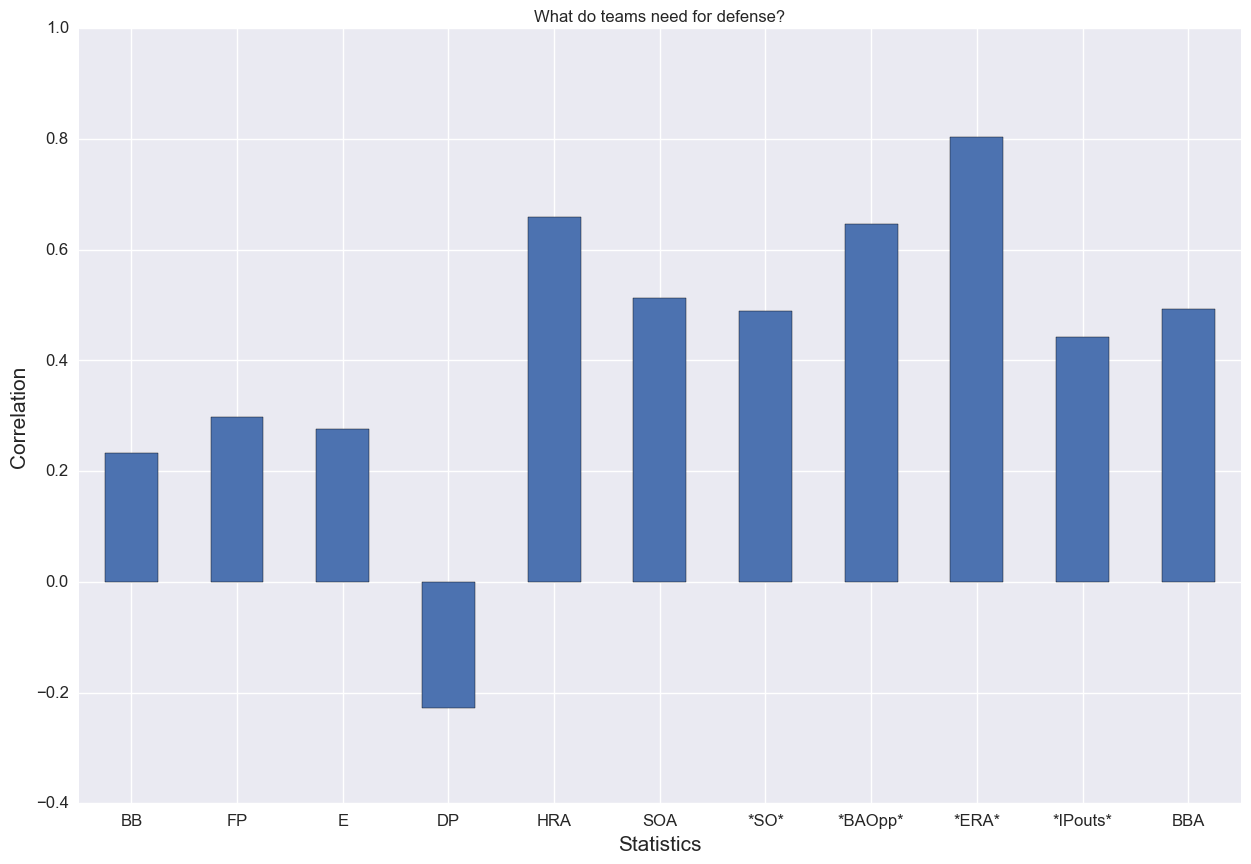

In [31]:
std_data[['BB','FP', 'E', 'DP', 'HRA','SOA', '*SO*', '*BAOpp*', '*ERA*', '*IPouts*', 'BBA']].apply(lambda x: x.corr(std_data['ERA'])).plot(kind='bar', title ="What do teams need for defense?", figsize=(15, 10), fontsize=12, rot=0)
plt.xlabel('Statistics', fontsize=15)
plt.ylabel('Correlation', fontsize=15)

Here, it is interesting to note that fielding percentage, number of errors, and number of double plays have weak relationship or no meaningful relationship with ERA or the number of runs given to opponents average. All three are deemed to be good indicators of strength of a team's defense; however, it looks like that is not the case. In fact, the correlation between number of fielding percentage and ERA is not much different from the correlation between ERA and number of walks earned by the batters, which is an offensive statistic.

## Answer to Question 4
Furthermore, running correlation with runs and ERA revealed that some of the statistics that deemed valuable by convention actually show no meaningful relationship with runs created or the strength of defense. The summary of findings was:
>1. Number of bases stolen and the number of triples do not correlate with number of runs scored.
2. Fielding percentage, which is a measure of a fielder's defensive strength, the number of errors, and the number of double plays do not correlate with ERA.

## Conclusions

What DePodesta emphasized in early 2000's was "getting on base." He discovered the power of simply getting on base and he was right. The analysis in this project shows also that he is still right to a certain extent. OBP is ranked number one among all statistics in correlation with win ratio. However, he was not quite right about the degree of OBP's significance. As shown by Steiger's Z test, although the correlation between OBP and win ratio was the highest, it was not significantly higher than that of starting pitchers' ERA and win ratio. Therefore, Korean view of baseball that puts much emphasis on strength of starting pitchers seems to be valid in Major League Baseball as well.

Furthermore, although DePodesta may have overestimated the power of SLG, it was nonetheless a good predictor of a team's win percentage as well as a team's offensive success. However, interestingly, the number of doubles and triples, which together make up SLG, were not good predictors of a team's probability of victory.

Lastly, it should be noted that some statistics that are deemed to indicate great value in baseball that actually show little correlation to meaningful results. The number of stolen bases, fielding percentage and the number of errors are such statistics. Therefore, a manager should be careful not to overvalue players who have outstanding records in those category but less than satisfactory records in other important measures such as OBP. 


### Souces
>1. Lewis, M. (2003). Moneyball: The art of winning an unfair game. New York: W.W. Norton.
2. Lee, I. A., & Preacher, K. J. (2013, September). Calculation for the test of the difference between two dependent correlations with one variable in common [Computer software]. Available from http://quantpsy.org.